# Credit Card Fraud Detection

Using the kaggle dataset linked below, I'll be working on developing an algorithm to predict fraud. In this challenge, we'll prioritize correctly finding fraud rather than correctly labeling non-fraudulent transactions.

https://www.kaggle.com/mlg-ulb/creditcardfraud

To provide further insight on the dataset, I've quoted the content section below from Kaggle: 

'
#### Content
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


In [23]:
#imports
import pandas as pd
import numpy as np

#visuals 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import models
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

#ignore warnings 
import warnings
warnings.filterwarnings("ignore")

#time
import time

In [24]:
#read in data
df = pd.read_csv('https://www.dropbox.com/s/6ial9neylb5ha33/creditcard.csv?dl=1')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


0    284315
1       492
Name: Class, dtype: int64


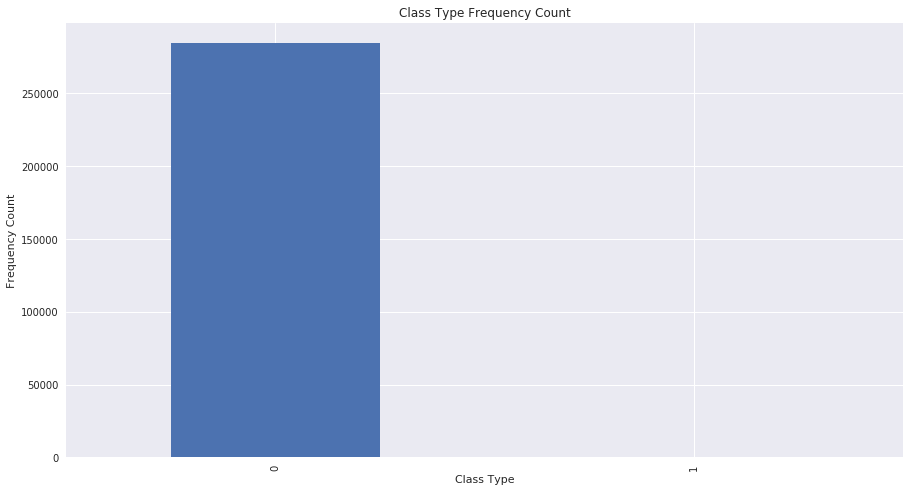

In [25]:
#set plot parameters
plt.rcParams['figure.figsize'] = (15.0, 8.0)
plt.rcParams.update({'font.size': 15})

#showcase outcome distribution
df.Class.value_counts().plot(kind = "bar")
plt.xlabel('Class Type')
plt.ylabel('Frequency Count')
plt.title('Class Type Frequency Count')
print(df.Class.value_counts())

Obviously we can see there's a very large class imbalance in this dataset.

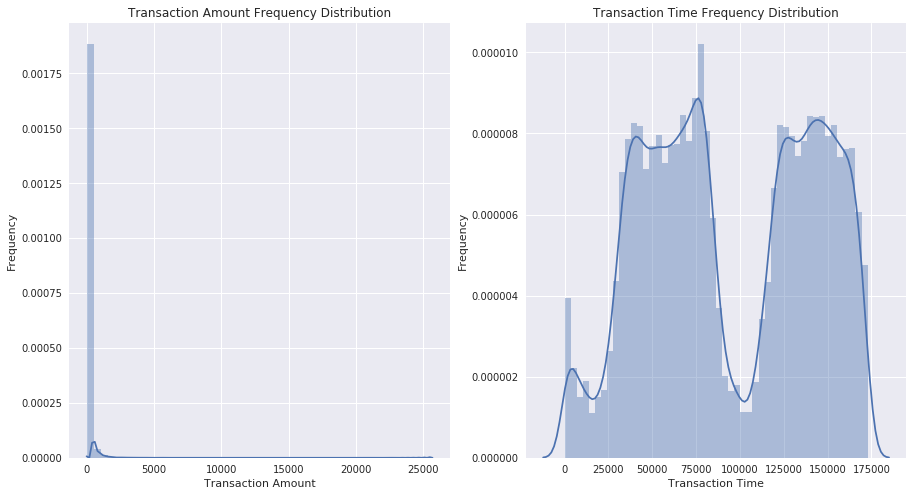

In [26]:
#distplot plots 
plt.subplot(1, 2, 1)
sns.distplot(df.Amount)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Transaction Amount Frequency Distribution')


plt.subplot(1,2,2)
sns.distplot(df.Time)
plt.xlabel('Transaction Time')
plt.ylabel('Frequency')
plt.title('Transaction Time Frequency Distribution');

In [27]:
#address the time and amount scale
from sklearn.preprocessing import minmax_scale

df[['Amount','Time']] = minmax_scale(df[['Amount','Time']])
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0


In [37]:
#create training/test sets
X = df.loc[:, ~df.columns.isin(['Time','Amount', 'Class'])]
Y = df['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3) 

## Random Forest Classifier

In [29]:
rfc = ensemble.RandomForestClassifier(n_estimators = 50, class_weight='balanced_subsample')
rfc_model = rfc.fit(X_train, Y_train)

cross_val_score(rfc, X_train, Y_train, cv=5) 

array([0.99944825, 0.99952349, 0.99937301, 0.99947333, 0.99964888])

In [48]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import average_precision_score, make_scorer

#param_grid = {'n_estimators': [10, 100, 1000], 'max_features': [5, 10, 20, 30]}
#clf = GridSearchCV(RandomForestClassifier(class_weight ='balanced_subsample'), param_grid, cv=5, scoring=make_scorer(average_precision_score))
#print(clf)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 100, 1000], 'max_features': [5, 10, 20, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(average_precision_score), verbose=0)


In [30]:
start_time = time.time()
print(rfc.score(X_test, Y_test))
print("--- %s seconds ---" % (time.time() - start_time))

0.9994850368081645
--- 0.504225969315 seconds ---


In [33]:
#test accuracy of Random Forest using Confusion matrix 
rfc_Y_pred = rfc.predict(X_test)
confusion_matrix(Y_test,rfc_Y_pred)

array([[85277,     8],
       [   36,   122]])

In [41]:
rfc.feature_importances_

array([0.00709302, 0.03235459, 0.02752808, 0.14974406, 0.00740021,
       0.0105686 , 0.03973052, 0.0087038 , 0.00617588, 0.07659609,
       0.07502396, 0.1017577 , 0.0061444 , 0.18764069, 0.00746411,
       0.06800757, 0.08590302, 0.00779554, 0.0142527 , 0.01067181,
       0.01331145, 0.0056555 , 0.00514208, 0.00445624, 0.00688231,
       0.00855965, 0.01777304, 0.00766337])

Looks like we have 8 False Positives and 36 False Negatives, so we mislabeled 8 non-fradulent transactions as fraud, and 36 fraudulent activities as non-fraudulent.  

## Logistic Regression

In [34]:
log_model = LogisticRegression(class_weight = 'balanced')
log_model.fit(X_train,Y_train)

cross_val_score(log_model, X_train, Y_train, cv=5) 

array([0.97717754, 0.97584832, 0.97752865, 0.97652547, 0.97344001])

In [35]:
start_time = time.time()
print(log_model.score(X_test, Y_test))
print("--- %s seconds ---" % (time.time() - start_time))

0.977095841672226
--- 0.012403011322 seconds ---


In [36]:
#test accuracy of Logistic Regression using Confusion matrix 
log_Y_pred = log_model.predict(X_test)
confusion_matrix(Y_test,log_Y_pred)

array([[83341,  1944],
       [   13,   145]])

Here it looks like the logistic regression labeled 1944 False Positives and 13 False Negatives, so we mislabeled 1944 non-fradulent transactions as fraud, and 13 fraudulent activities as non-fraudulent. Though our accuracy score is better in the Random Forest Classifier, we're prioritizing catching fraud over correctly labeleing non-fraudulent transactions. Thus, our logistic regression model will win over our random forest with 23 more fraudulent transactions caught by our logisitc model. 